<a href="https://colab.research.google.com/github/ramrajv/Ramraj_Prayag_Kaggle/blob/main/TelecomChurn_Test_101320.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom Churn Case Study

---
                                         Completed By Ramraj Vasudevan and Prayag Sanjay in April 2022


## Problem Statment

Build a machine learning model that is able to predict churning customers of a telecom company based on the features provided for their usage.

### Goals of Study

**1. To find out which high value customer will churn in near future.**

**2. To identify variable which are strong indicator of churn.**

**3. Recommend strategy to manage the churn of the customers.**


## 3. Approach

From the problem statement, we can see following characterstics

1. Business wants to know the driver variables for a specific target, in the churn prediction.
   So there is an expectation of **explainability** from the model.
   

2. Business want to **predict** whether a customer will churn or not/.

Thus this problem falls in realms of **predictive analysis** where we want to interpolate the data. 
Aa a result of above two reasons we will employ following steps

1. Exploratory Data Analysis
   -  Data Understanding and cleaning
   -  Null value handling
   -  Visualising Data
   
   
2. Deriving additional features


3. Logistic Regresssion with feature selection using RFE


4. Dimensionality Reduction using PCA


5. Predition using SVM


6. Prediction using Decision Trees and Random Forest


7. Prediction using XGBoost


9. Evaluation of various models and comparison


10. Conclusion and recommendation for business


## Exploratory Data Analysis

### Data Understanding

#### Load libraries

In [1]:
# Load libraries
import numpy as np
import pandas as pd

import datetime as dt

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,8)

from scipy.stats import norm
from scipy import stats

import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load train data

url = 'https://media.githubusercontent.com/media/ramrajv/Ramraj_Prayag_Kaggle/main/train.csv'
train = pd.read_csv(url)

In [3]:
# Load test data

url = 'https://raw.githubusercontent.com/ramrajv/Ramraj_Prayag_Kaggle/main/test%20(1).csv'
test = pd.read_csv(url)

In [4]:
df = pd.concat([train, test])

In [5]:
df.reset_index(inplace = True)
df.drop('index', axis = 1, inplace = True)
df.index

RangeIndex(start=0, stop=99999, step=1)

In [6]:
df['churn_probability'].unique()

array([ 0.,  1., nan])

### Check for unique values

In [7]:
df.shape

(99999, 172)

In [8]:
df.head().T

,0,1,2,3,4
id,0,1,2,3,4
circle_id,109,109,109,109,109
loc_og_t2o_mou,0.0,0.0,0.0,0.0,0.0
std_og_t2o_mou,0.0,0.0,0.0,0.0,0.0
loc_ic_t2o_mou,0.0,0.0,0.0,0.0,0.0
last_date_of_month_6,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014
last_date_of_month_7,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014
last_date_of_month_8,8/31/2014,8/31/2014,8/31/2014,8/31/2014,8/31/2014
arpu_6,31.277,0.0,60.806,156.362,240.708
arpu_7,87.009,122.787,103.176,205.26,128.191


In [9]:
df.columns[df.nunique()==1]

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [10]:
# Drop columns with single unique values

df.drop(df.columns[df.nunique()==1], axis = 1, inplace = True)

In [11]:
df.dropna(axis = 1, inplace = True, how = 'all')

In [12]:
two_f = df.columns[df.nunique()==2]

In [13]:
two_f

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8', 'churn_probability'],
      dtype='object')

In [14]:
two_f = df[two_f].drop('churn_probability', axis = 1).columns

In [15]:
two_f

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8'],
      dtype='object')

In [16]:
for col in two_f:
    print(col, df[col].unique())

night_pck_user_6 [nan  0.  1.]
night_pck_user_7 [nan  0.  1.]
night_pck_user_8 [nan  0.  1.]
fb_user_6 [nan  1.  0.]
fb_user_7 [nan  1.  0.]
fb_user_8 [nan  1.  0.]


### Categorical Variables

In [17]:
cat_vars = df.columns[df.nunique()<20]
cat_vars

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'churn_probability'],
      dtype='object')

In [18]:
cat_vars = df[cat_vars].drop('churn_probability', axis = 1).columns
cat_vars

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')

In [118]:
# Null value treatment of categoricals

for col in cat_vars:
    df[col].fillna(df[col].median(), inplace = True)

In [119]:
df[cat_vars].isna().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
monthly_2g_6        0
monthly_2g_7        0
monthly_2g_8        0
monthly_3g_6        0
monthly_3g_7        0
monthly_3g_8        0
fb_user_6           0
fb_user_7           0
fb_user_8           0
dtype: int64

In [123]:
df[cat_vars].sample(5)

,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_6,fb_user_7,fb_user_8
5847,0.0,0.0,0.0,1,0,0,0,0,0,1.0,1.0,1.0
99881,0.0,0.0,0.0,0,0,0,1,1,0,1.0,1.0,1.0
78229,0.0,0.0,0.0,0,0,0,0,0,0,1.0,1.0,1.0
79644,0.0,0.0,0.0,0,0,0,0,0,0,1.0,1.0,1.0
71415,0.0,0.0,0.0,0,0,0,0,0,0,1.0,1.0,1.0


In [124]:
# Check for Null Values in dataset

df.columns[df.isna().sum()/df.shape[0]>0]

Index(['churn_probability'], dtype='object')

### Drop null data

#### Drop rows with all null values

In [23]:
df.dropna(how = 'all', inplace = True)

In [24]:
df.shape

(99999, 159)

#### Treat columns with null values in more than 70% of the rows

In [25]:
# Check types of variables

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99998
Columns: 159 entries, id to churn_probability
dtypes: float64(127), int64(26), object(6)
memory usage: 122.1+ MB


There are six variables of object type. First we will inspect this

In [26]:
obj = df.columns[df.dtypes=='O']
df[obj].sample(5)

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
2714,6/21/2014,7/31/2014,8/31/2014,NaN,NaN,NaN
78357,6/25/2014,7/22/2014,8/18/2014,6/10/2014,7/14/2014,NaN
71639,6/28/2014,7/24/2014,8/23/2014,6/21/2014,7/3/2014,8/4/2014
94108,6/29/2014,7/31/2014,8/18/2014,NaN,7/31/2014,8/18/2014
50196,6/27/2014,7/30/2014,8/28/2014,NaN,NaN,NaN


The object variables are datetime type variables. We need to convert these into integer type. We will get the recency of recharges for every month by subtracting max date of each variable from the date values

In [27]:
# Convert date values to float representing days

for ele in obj:
    df[ele] = (pd.to_datetime(df[ele]).max() - pd.to_datetime(df[ele])).dt.days

In [28]:
# Check for null values in object type variables

df[obj].isna().sum()/df.shape[0]*100

date_of_last_rech_6          1.607016
date_of_last_rech_7          1.767018
date_of_last_rech_8          3.622036
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
dtype: float64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99998
Columns: 159 entries, id to churn_probability
dtypes: float64(133), int64(26)
memory usage: 122.1 MB


In [30]:
df.isna().sum()/df.shape[0]*100

id                           0.000000
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_8                5.378054
loc_og_t2t_mou_6             3.937039
loc_og_t2t_mou_7             3.859039
loc_og_t2t_mou_8             5.378054
loc_og_t2m_mou_6             3.937039
loc_og_t2m_mou_7             3.859039
loc_og_t2m_mou_8             5.378054
loc_og_t2f_mou_6             3.937039
loc_og_t2f_mou_7             3.859039
loc_og_t2f_mou_8             5.378054
loc_og_t2c_mou_6             3.937039
loc_og_t2c_m

In [31]:
cat_vars

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')

### Null Value Imputation

In [32]:
df_nvi = df.drop(['id','churn_probability'], axis = 1)
df_nvi.drop(cat_vars, axis = 1, inplace = True)
med_cols = df_nvi[df_nvi.columns[abs(df_nvi.mean() - df_nvi.median())/\
                               df_nvi.median()>=0.5]].columns

In [33]:
mean_cols = df_nvi.drop(med_cols, axis = 1).columns

In [34]:
# Impute null values as per mean or median values

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imp_med = SimpleImputer(missing_values = np.nan, strategy = 'median',verbose=0)
imp_mean = imp_mean.fit(df_nvi[mean_cols])
imp_med = imp_med.fit(df_nvi[med_cols])
df_nvi[mean_cols] = imp_mean.transform(df_nvi[mean_cols])
df_nvi[med_cols] = imp_med.transform(df_nvi[med_cols])
df[df_nvi.columns] = df_nvi

In [35]:
df.columns[df.isna().sum()>0]

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8', 'churn_probability'],
      dtype='object')

#### Infinite value check

In [36]:
# Check for infinite values

print("Printing the count of infinity values")
  
count = np.isinf(df).values.sum()
print("Train dataset contains " + str(count) + " infinite values")

Printing the count of infinity values
Train dataset contains 0 infinite values


In [ ]:
df1 = df.copy()
for col in df1.columns:
    if col != 'churn_probability':
        percentiles = df1[col].quantile([0.01,0.99]).values
        df1[col][df1[col] <= percentiles[0]] = percentiles[0]
        #df_test[col][df_test[col] <= percentiles[0]] = percentiles[0] 
        df1[col][df1[col] >= percentiles[1]] = percentiles[1]
        #df_test[col][df_test[col] >= percentiles[1]] = percentiles[1]

## Visualising Data



In [ ]:
# plot the boxplot and histplot

def plot_box_dist(col1, col2, col3):
    plt.figure(figsize=(20, 18))

    # plot the boxplot
    
    plt.subplot(2,3,1)
    sns.boxplot(x = 'churn_probability', y = col1, data = df, palette={0: "g", 1: "r"})
    plt.subplot(2,3,2)
    sns.boxplot(x = 'churn_probability', y = col2, data = df, palette={0: "g", 1: "r"})
    plt.subplot(2,3,3)
    sns.boxplot(x = 'churn_probability', y = col3, data = df, palette={0: "g", 1: "r"})

    # plot the histogram
    
    plt.subplot(2,3,4)
    sns.histplot(df[df['churn_probability'] == 0][col1], color = 'green', kde = True)
    sns.histplot(df[df['churn_probability'] == 1][col1], color = 'red', kde=True)
    plt.legend(['Not churn', 'churn'])
    plt.subplot(2,3,5)
    sns.histplot(df[df['churn_probability'] == 0][col2], color = 'green',kde = True)
    sns.histplot(df[df['churn_probability'] == 1][col2], color = 'red', kde=True)
    plt.legend(['Not churn', 'churn'])
    plt.subplot(2,3,6)
    sns.histplot(df[df['churn_probability'] == 0][col3], color = 'green',kde = True)
    sns.histplot(df[df['churn_probability'] == 1][col3], color = 'red', kde=True)
    
    plt.legend(['Not churn', 'churn'])

### Average Revenue Per User (ARPU)

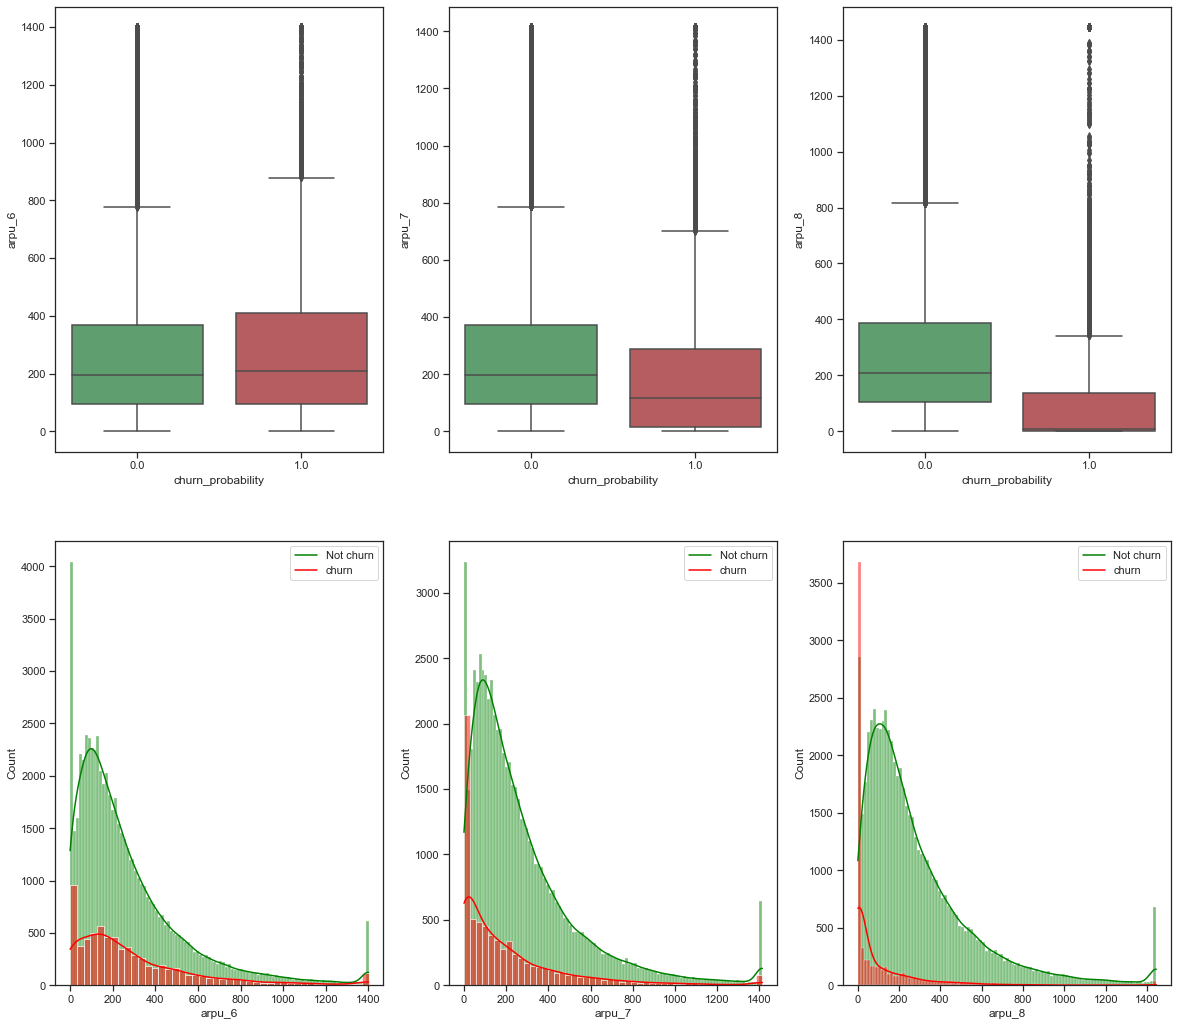

In [ ]:
plot_box_dist('arpu_6', 'arpu_7', 'arpu_8')

**Observations:**

Average revenue per customer is goes on decreasing for churn customers.

Majority of the data is right skewed.

Outliers can be seen for this feature.

### Total Minutes of Usage for Incoming call 

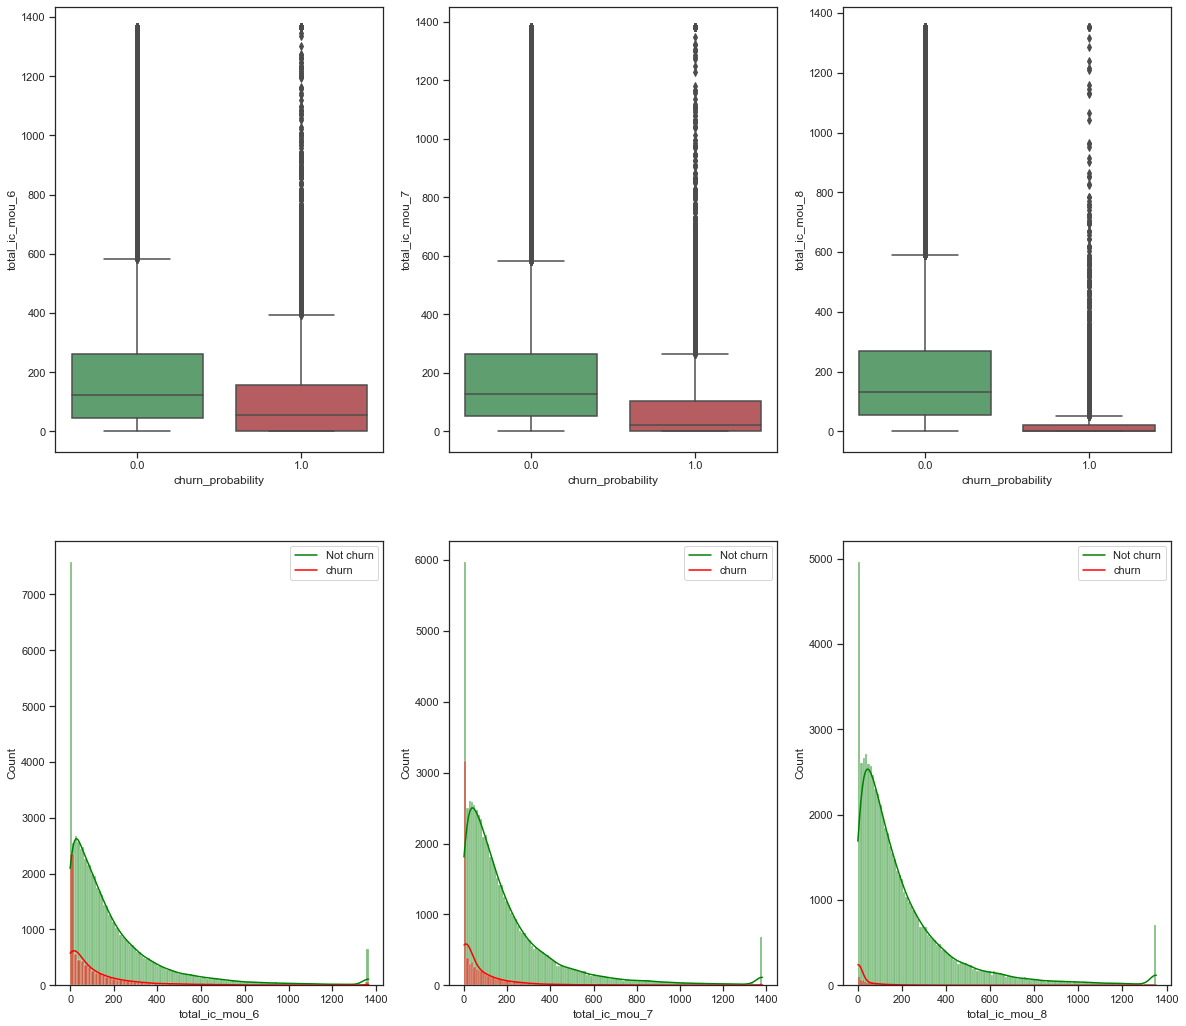

In [ ]:
plot_box_dist('total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8')

**Observations:**

Minutes of incoming call usage goes on decreasing for churn customers.

Majority of the data is right skewed.

Outliers can be seen for this feature.

### Total Minutes of Usage for Outgoing call 

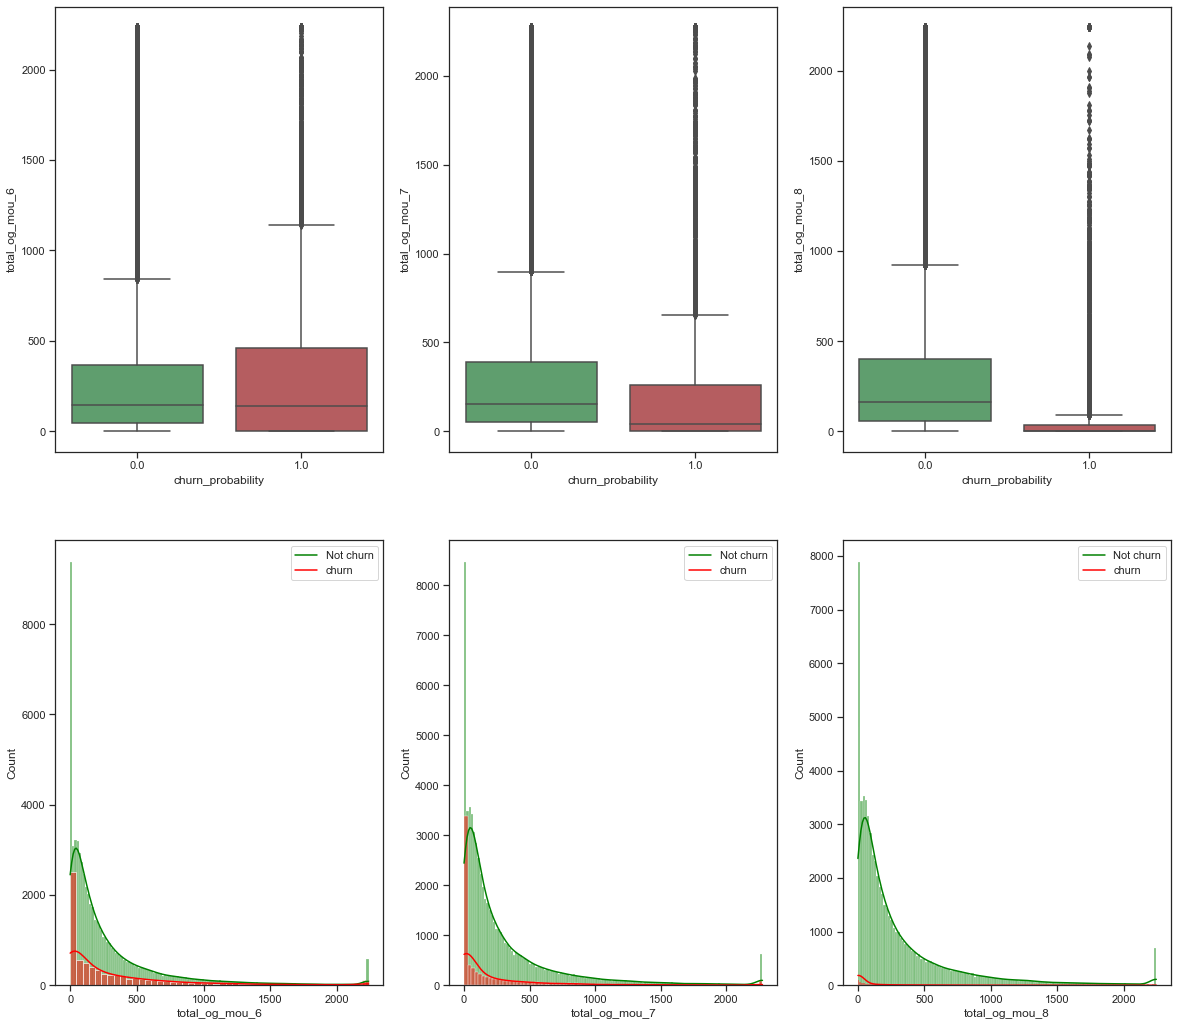

In [ ]:
plot_box_dist('total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8')

**Observations:**

Total minutes of outgoing call usage goes on decreasing for churn customers.

Majority of the data is right skewed.

Outliers can be seen for this feature.

### Number of total recharges

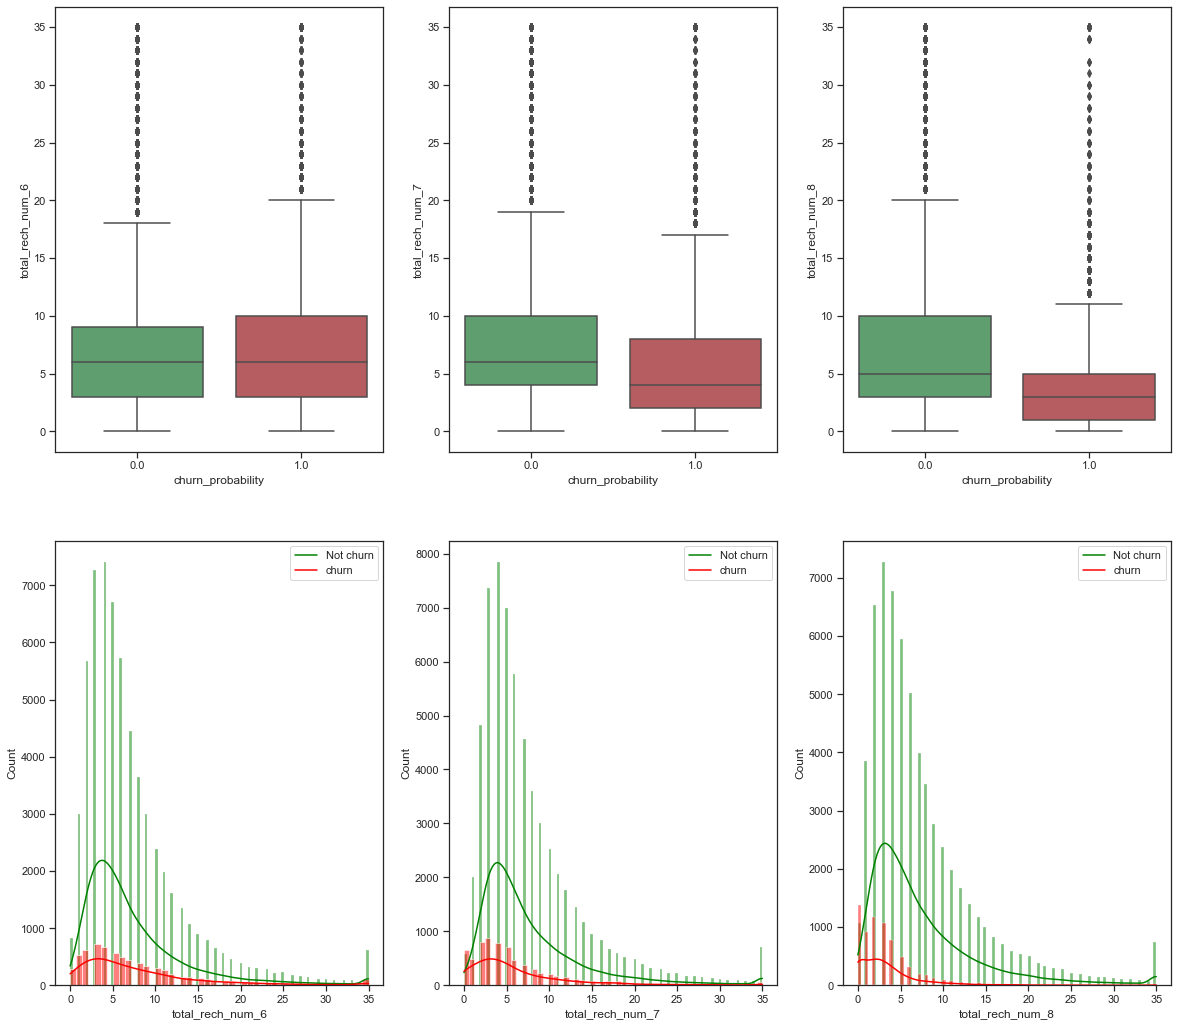

In [ ]:
plot_box_dist('total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8')

**Observations:**

Number of total recharges goes on decreasing for churn customers.

Majority of the data is right skewed.


### Total Recharge Amount

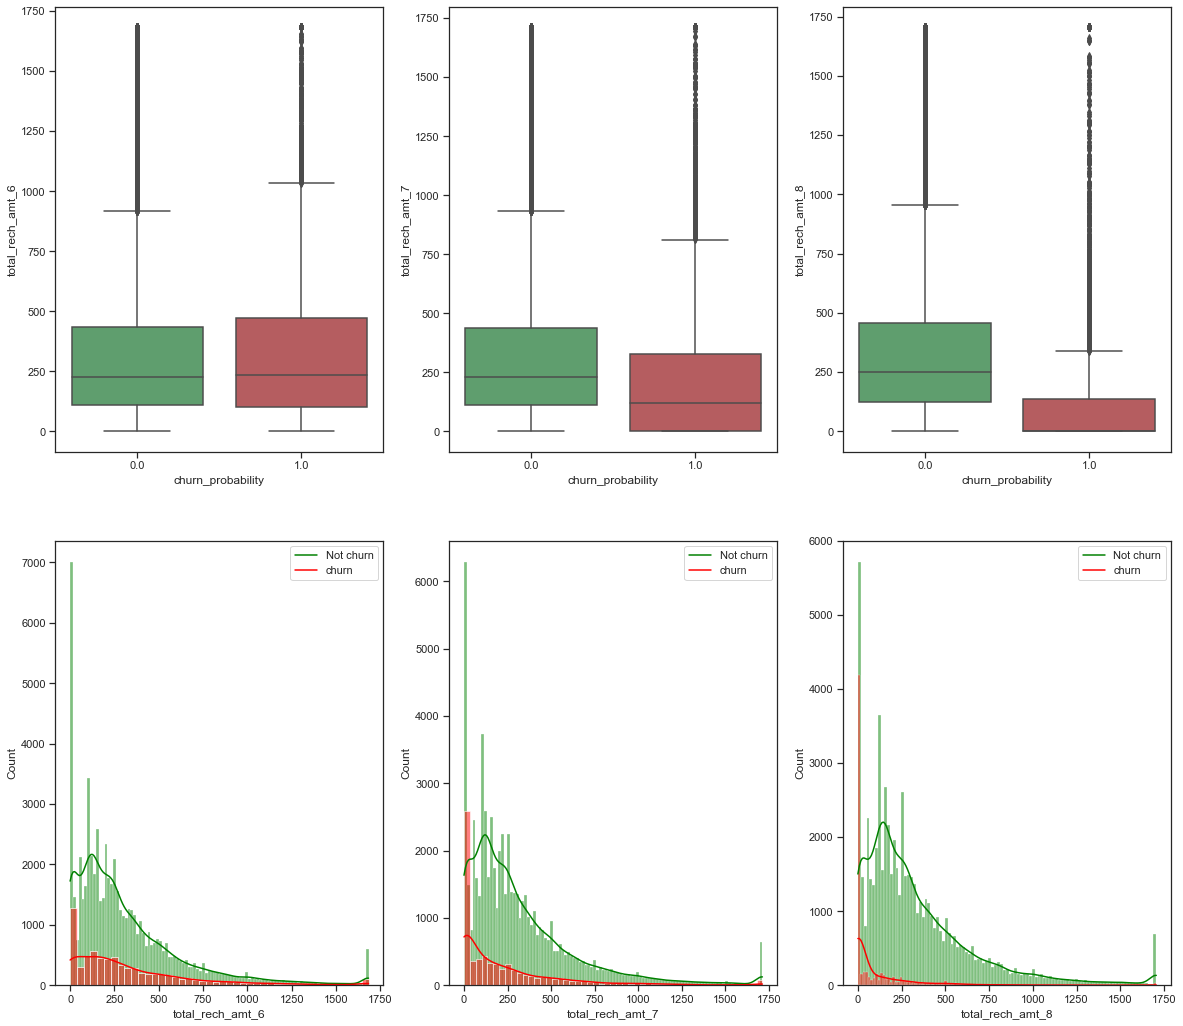

In [ ]:
plot_box_dist('total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8')

**Observations:**

Total value of recharges goes on decreasing for churn customers.

Majority of the data is right skewed.

### Average Age of customer on the network

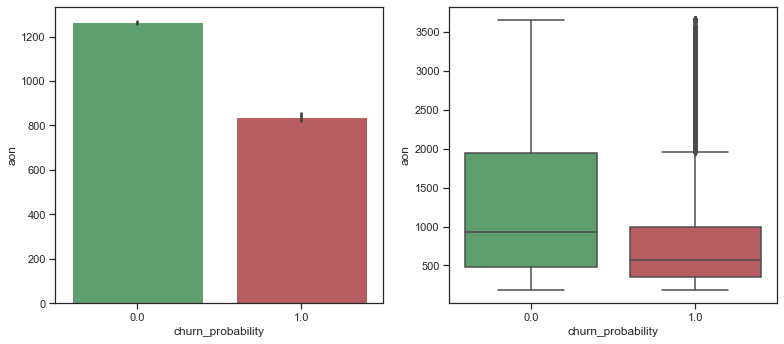

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.barplot(x = 'churn_probability', y = 'aon', data = df, palette={0: "g", 1: "r"})
plt.subplot(2,3,2)
sns.boxplot(x = 'churn_probability', y = 'aon', data = df, palette={0: "g", 1: "r"})
plt.show()

**Observations:**

Average age on the network for churn customers is less than the non-churn customers.


### Heatmap to show co-relation between recharge amounts features

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'],
      dtype='object')


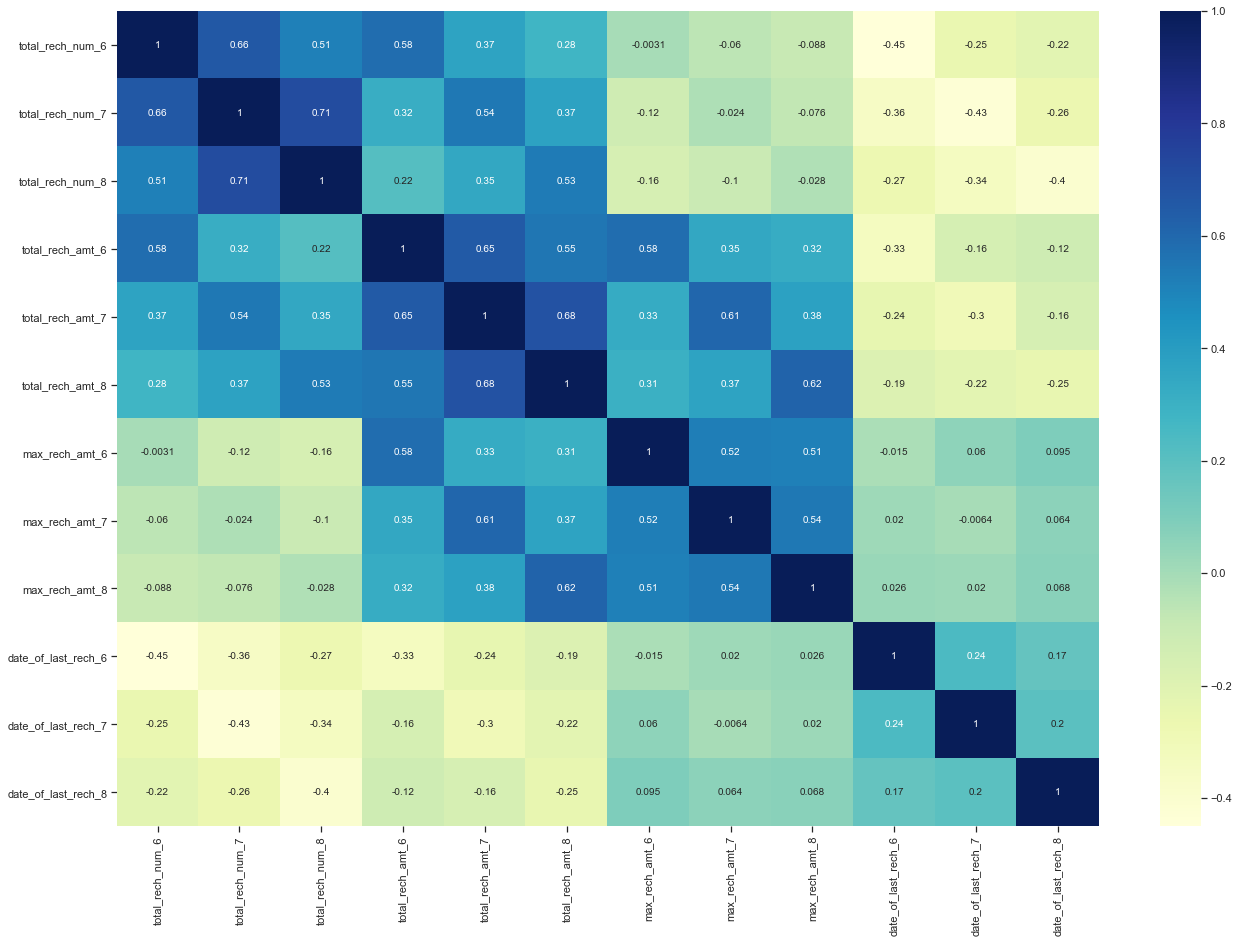

In [ ]:
rech_df = df.filter(regex = 'rech')
print(rech_df.columns)
fig = plt.figure(figsize=(22, 15))
sns.heatmap(rech_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Observations:**

There is high-correlation between recharge amounts in months and 7 and 8. This indicates the direction that customer will take.
For e.g. for less recharge, he might churn


### Heatmap to show co-relation between incoming mintues of usage features

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'loc_ic_mou_6',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7',
       'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6',
       'isd_ic_mou_7', 'isd_ic_mou_8'],
      dtype='object')


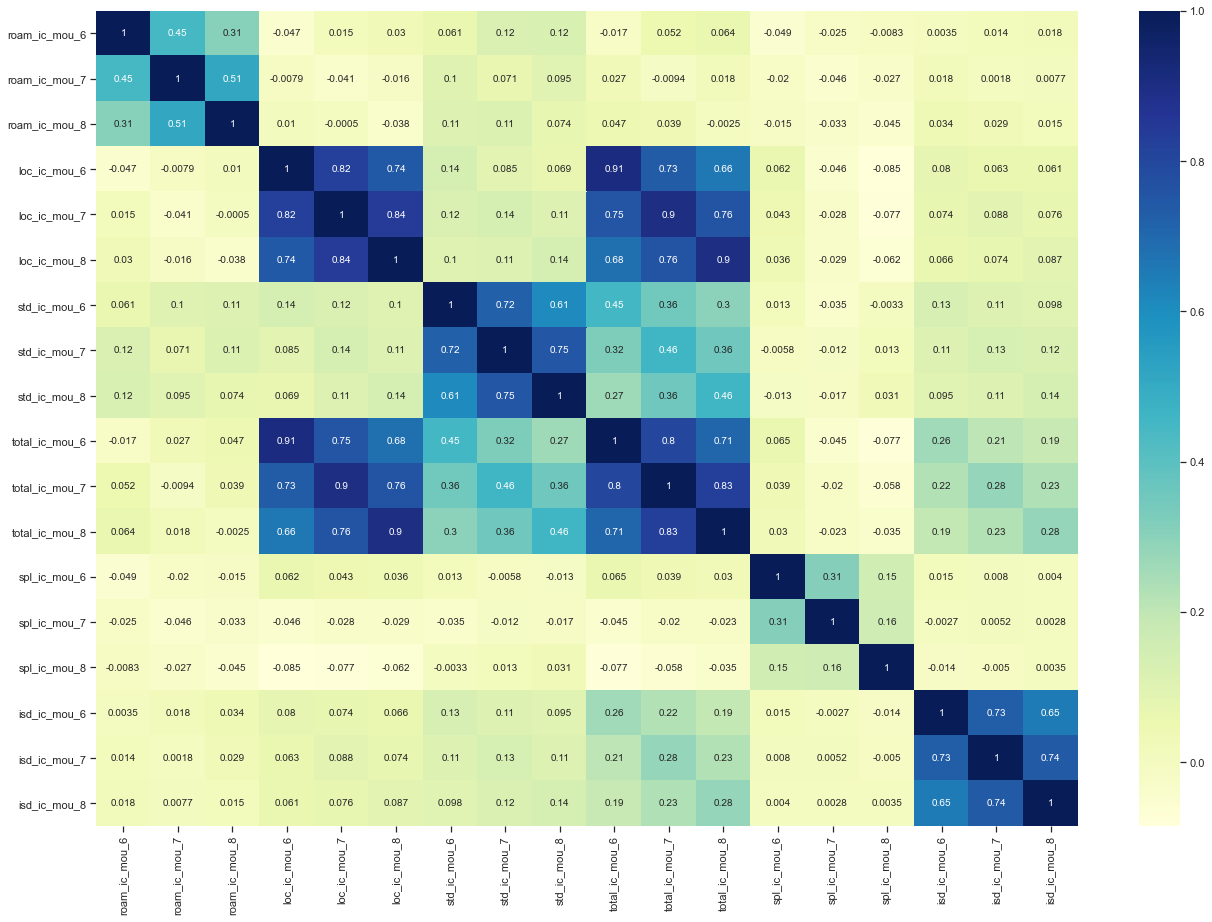

In [ ]:
rech_df = df.filter(regex = 'ic_mou')
print(rech_df.columns)
fig = plt.figure(figsize=(22, 15))
sns.heatmap(rech_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Observations:**

There is high-correlation  between months usage for isd calls for months 6,7 and 8.

There is high-correlation between total minutes of usage and local call's minutes of usage.


### Grouping

In [37]:
df['churn_probability'].unique()

array([ 0.,  1., nan])

In [62]:
df.groupby('churn_probability')[['arpu_6','arpu_7','arpu_8']].median()

,arpu_6,arpu_7,arpu_8
churn_probability,,,
0.0,196.1250,198.916,210.0260
1.0,210.6765,118.348,9.9695


In [63]:
# Check monthly schemes

df.groupby('churn_probability')[cat_vars].agg(pd.Series.mode)

,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_6,fb_user_7,fb_user_8
churn_probability,,,,,,,,,,,,
0.0,0.0,0.0,0.0,0,0,0,0,0,0,1.0,1.0,1.0
1.0,0.0,0.0,0.0,0,0,0,0,0,0,1.0,1.0,1.0


The categorical variables have no bearing on the target variable.

---

#### Data Understanding

In this section we will explore all types of customer activity based on available fields.

We will check the total recharge against ARPU.

In [65]:
df['diff_tot_arpu_6'] = df['total_rech_amt_6'] - df['arpu_6']

In [66]:
df['diff_tot_arpu_7'] = df['total_rech_amt_7'] - df['arpu_7']
df['diff_tot_arpu_8'] = df['total_rech_amt_8'] - df['arpu_8']

In [67]:
diff_vars = ['diff_tot_arpu_6','diff_tot_arpu_7','diff_tot_arpu_8']
df.groupby('churn_probability')[diff_vars].median()

,diff_tot_arpu_6,diff_tot_arpu_7,diff_tot_arpu_8
churn_probability,,,
0.0,28.7280,29.231,31.985
1.0,27.2555,5.576,0.000


Customers with recharge more than ARPU have remained with the network

In [68]:
# Drop difference columns

df.drop(diff_vars, axis = 1, inplace = True)

In [69]:
# Check variance of Age of Network with churn

df.groupby('churn_probability')['aon'].agg('mean')

churn_probability
0.0    1264.003293
1.0     838.399327
Name: aon, dtype: float64

Customers with lower age on network are likely to churn.

---

---

In [70]:
df['churn_probability'].value_counts()

0.0    62867
1.0     7132
Name: churn_probability, dtype: int64

In [71]:
# Check the total minutes of usage against churn and non churn cases

df.groupby('churn_probability')[['total_ic_mou_6', 'total_og_mou_6']].agg('mean')

,total_ic_mou_6,total_og_mou_6
churn_probability,,
0.0,206.643635,301.242079
1.0,138.597825,352.370766


In [72]:
df.groupby('churn_probability')[['total_ic_mou_7', 'total_og_mou_7']].agg('mean')

,total_ic_mou_7,total_og_mou_7
churn_probability,,
0.0,213.892542,318.252422
1.0,95.972761,242.877399


In [73]:
df.groupby('churn_probability')[['total_ic_mou_8', 'total_og_mou_8']].agg('mean')

,total_ic_mou_8,total_og_mou_8
churn_probability,,
0.0,216.701665,328.550893
1.0,37.919282,92.624937


The churn categories have used lesser minutes. Indicates that the carrier charges higher for lesser period of usage.

In [74]:
# Check for data usage

df.groupby('churn_probability')[['vol_2g_mb_6', 'vol_3g_mb_6']].agg('mean')

,vol_2g_mb_6,vol_3g_mb_6
churn_probability,,
0.0,52.993459,124.938010
1.0,41.023999,97.789079


In [75]:
df.groupby('churn_probability')[['vol_2g_mb_7', 'vol_3g_mb_7']].agg('mean')

,vol_2g_mb_7,vol_3g_mb_7
churn_probability,,
0.0,53.696628,135.722042
1.0,29.587367,69.103268


In [76]:
df.groupby('churn_probability')[['vol_2g_mb_8', 'vol_3g_mb_8']].agg('mean')

,vol_2g_mb_8,vol_3g_mb_8
churn_probability,,
0.0,54.559777,146.931172
1.0,11.058022,34.604651


In [77]:
# Check for On net and Offnet usage

df.groupby('churn_probability')[['onnet_mou_6', 'offnet_mou_6']].agg('mean')

,onnet_mou_6,offnet_mou_6
churn_probability,,
0.0,124.488166,191.866904
1.0,171.172235,220.841158


In [78]:
df.groupby('churn_probability')[['arpu_6','arpu_7','arpu_8']].agg('mean')

,arpu_6,arpu_7,arpu_8
churn_probability,,,
0.0,280.280668,284.891073,297.535694
1.0,308.289067,219.081400,114.226380


In [79]:
df.groupby('churn_probability')[['total_rech_num_6', 'total_rech_amt_6']].agg('mean')

,total_rech_num_6,total_rech_amt_6
churn_probability,,
0.0,7.504939,325.570888
1.0,8.109366,350.784072


In [80]:
df.groupby('churn_probability')[['total_rech_num_7', 'total_rech_amt_7']].agg('mean')

,total_rech_num_7,total_rech_amt_7
churn_probability,,
0.0,7.856173,331.234352
1.0,6.388811,244.295149


In [81]:
df.groupby('churn_probability')[['total_rech_num_8', 'total_rech_amt_8']].agg('mean')

,total_rech_num_8,total_rech_amt_8
churn_probability,,
0.0,7.629774,346.878712
1.0,3.656338,120.821228


In [82]:
# Make a variable - average recharge amount

df.loc[df['total_rech_num_6']>0,'avg_rech_amt_6'] = df['total_rech_amt_6']/df['total_rech_num_6']
df.loc[df['total_rech_num_7']>0,'avg_rech_amt_7'] = df['total_rech_amt_7']/df['total_rech_num_7']
df.loc[df['total_rech_num_8']>0,'avg_rech_amt_8'] = df['total_rech_amt_8']/df['total_rech_num_8']

df[['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8']].fillna(0, inplace = True)

In [83]:
avgrechamt = ['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8']
df.groupby('churn_probability')[avgrechamt].mean()

,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8
churn_probability,,,
0.0,47.915508,48.062973,58.530991
1.0,49.131258,38.094136,27.868988


The average rechange amount shows an increasing trend in case of continuining customers and a reducing trend in case of churn customers.

In [84]:
# Drop derived columns

df.drop(avgrechamt, axis = 1, inplace = True)

---

### Metrics for Case Study

#### Metric 1

Trends of ARPU, Total MOU and Total recharges

In [85]:
# Get trend of arpu, total mou and total recharges

# ARPU Trend
df['arpu_trend'] = df['arpu_6'] + df['arpu_8'] - 2*df['arpu_7']

# Total MOU Trend
df['total_mou_trend'] = (df['total_ic_mou_6'] + df['total_og_mou_6']) + \
                        (df['total_ic_mou_8'] + df['total_og_mou_8']) - \
                        2*(df['total_ic_mou_7'] + df['total_og_mou_7'])

# Total Recharge Trend
df['total_rech_trend'] = (df['total_rech_amt_6'] + df['total_rech_amt_8']) - \
                        2*df['total_rech_amt_7']

In [86]:
trend_cols = ['arpu_trend','total_mou_trend','total_rech_trend']
df.groupby('churn_probability')[trend_cols].describe().T

churn_probability                0.0           1.0
arpu_trend       count  62867.000000   7132.000000
                 mean       8.034216    -15.647353
                 std      352.150819    525.597937
                 min   -10932.456000 -10889.744000
                 25%     -111.023000   -201.124000
                 50%       16.760000     38.936500
                 75%      143.406000    202.621250
                 max    10408.476000  11505.508000
total_mou_trend  count  62867.000000   7132.000000
                 mean     -11.151656    -56.187510
                 std      621.672216    840.225102
                 min   -11373.420000  -8355.230000
                 25%     -173.825000   -234.612500
                 50%       13.220000      0.000000
                 75%      190.595000    239.792500
                 max    16016.000000   7078.090000
total_rech_trend count  62867.000000   7132.000000
                 mean       9.980896    -16.984997
                 std      482.814050    653.943450
                 min   -12232.000000 -14782.000000
                 25%     -164.000000   -230.000000
                 50%       20.000000     48.000000
                 75%      207.000000    248.000000
                 max    11748.000000  12000.000000

The recharge trend is positive in case of non churn compared to churn cases where it is negative. The arpu trend and MOU trend also follow suit

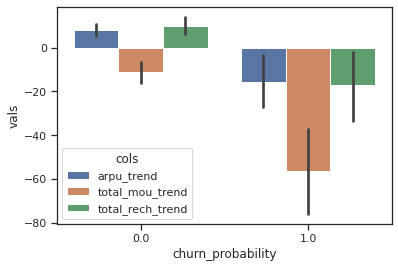

In [87]:
trend_cols = ['arpu_trend','total_mou_trend','total_rech_trend']
trend_cols.append('churn_probability')
dft = df[trend_cols]
dfm = dft.melt('churn_probability', var_name='cols', value_name='vals')
sns.barplot(x="churn_probability", y="vals", hue='cols', data=dfm)

The trends of ARPU and Total Recharge columns show a clear distinction between churn and non churn. The Total minutes of use trend shows a higher negative trend for customers who churn.

#### Metric 2

Ratio of number of recharges to age of recharge

In [88]:
df.groupby('churn_probability')[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']].mean()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
churn_probability,,,
0.0,5.764805,5.293641,5.310178
1.0,6.372266,7.268251,7.740999


In [89]:
df[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','churn_probability']].corr()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,churn_probability
date_of_last_rech_6,1.000000,0.259213,0.193078,0.030140
date_of_last_rech_7,0.259213,1.000000,0.224576,0.104524
date_of_last_rech_8,0.193078,0.224576,1.000000,0.122562
churn_probability,0.030140,0.104524,0.122562,1.000000


In [91]:
cols = ['total_rech_num_6', 'total_rech_num_7','total_rech_num_8',\
        'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']

df_train = df[df['churn_probability'].notna()]
df_train[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
total_rech_num_6,69999.0,7.566522,7.041452,0.0,3.0,6.0,9.0,170.0
total_rech_num_7,69999.0,7.706667,7.050614,0.0,3.0,6.0,10.0,138.0
total_rech_num_8,69999.0,7.224932,7.195597,0.0,3.0,5.0,9.0,138.0
date_of_last_rech_6,69999.0,5.826698,6.096815,0.0,1.0,3.0,9.0,29.0
date_of_last_rech_7,69999.0,5.494829,5.714715,0.0,1.0,4.0,8.0,30.0
date_of_last_rech_8,69999.0,5.557847,5.999668,0.0,1.0,4.0,7.0,30.0


In [92]:
# Get ratio of number of recharges to recharge age

df.loc[df['date_of_last_rech_6']>0,'num_age_ratio_6'] = df['total_rech_num_6']\
                                                    /df['date_of_last_rech_6']

In [93]:
df['num_age_ratio_6'].isna().sum()

16960

In [94]:
df['num_age_ratio_6'].fillna(0, inplace = True)

In [96]:
df_train = df[df['churn_probability'].notna()]
df_train['num_age_ratio_6'].describe()

count    69999.000000
mean         2.383417
std          4.427788
min          0.000000
25%          0.117647
50%          0.666667
75%          2.500000
max        102.000000
Name: num_age_ratio_6, dtype: float64

In [97]:
df.loc[df['date_of_last_rech_7']>0,'num_age_ratio_7'] = df['total_rech_num_7']\
                                                    /df['date_of_last_rech_7']

df.loc[df['date_of_last_rech_8']>0,'num_age_ratio_8'] = df['total_rech_num_8']\
                                                    /df['date_of_last_rech_8']

df['num_age_ratio_7'].fillna(0, inplace = True)
df['num_age_ratio_8'].fillna(0, inplace = True)

In [98]:
num_age_ratio = ['num_age_ratio_6', 'num_age_ratio_7','num_age_ratio_8']
df.groupby('churn_probability')[num_age_ratio].median()

,num_age_ratio_6,num_age_ratio_7,num_age_ratio_8
churn_probability,,,
0.0,0.666667,0.714286,0.750000
1.0,0.600000,0.428571,0.333333


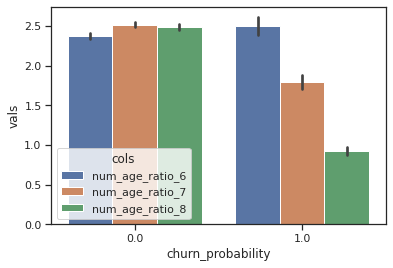

In [99]:
num_age_ratio = ['num_age_ratio_6', 'num_age_ratio_7','num_age_ratio_8']
num_age_ratio.append('churn_probability')
dft = df[num_age_ratio]
dfm = dft.melt('churn_probability', var_name='cols', value_name='vals')
g = sns.barplot(x="churn_probability", y="vals", hue='cols', data=dfm)

The ratio of number of recharges to age of recharge for churn cases is lower than non churn cases for months 7 and 8 whereas, it is slightly higher in case of month 6

---

#### Metric 3

Ratio of average recharge to age of recharge

In [100]:
# Get average recharge amount

df.loc[df['total_rech_num_6']>0,'avg_rech_6'] = df['total_rech_amt_6'] / \
                                                df['total_rech_num_6']

df.loc[df['total_rech_num_7']>0,'avg_rech_7'] = df['total_rech_amt_7'] / \
                                                df['total_rech_num_7']

df.loc[df['total_rech_num_8']>0,'avg_rech_8'] = df['total_rech_amt_8'] / \
                                                df['total_rech_num_8'] 

df['avg_rech_6'].fillna(0, inplace = True)
df['avg_rech_7'].fillna(0, inplace = True)
df['avg_rech_8'].fillna(0, inplace = True)

# Get ratio of average recharge to age of recharge

df.loc[df['date_of_last_rech_6']>0,'avg_age_ratio_6'] = df['avg_rech_6']/\
                                                    df['date_of_last_rech_6']

df.loc[df['date_of_last_rech_7']>0,'avg_age_ratio_7'] = df['avg_rech_7']/\
                                                    df['date_of_last_rech_7']

df.loc[df['date_of_last_rech_8']>0,'avg_age_ratio_8'] = df['avg_rech_8']/\
                                                    df['date_of_last_rech_8']  

df['avg_age_ratio_6'].fillna(0, inplace = True)
df['avg_age_ratio_7'].fillna(0, inplace = True)
df['avg_age_ratio_8'].fillna(0, inplace = True)

In [101]:
avg_age_ratio = ['avg_age_ratio_6', 'avg_age_ratio_7','avg_age_ratio_8']

df.groupby('churn_probability')[avg_age_ratio].median()

,avg_age_ratio_6,avg_age_ratio_7,avg_age_ratio_8
churn_probability,,,
0.0,5.236364,5.350000,6.833333
1.0,4.166667,1.428571,0.000000


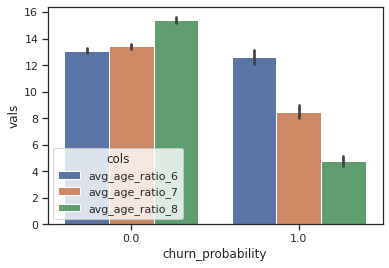

In [102]:
avg_age_ratio = ['avg_age_ratio_6', 'avg_age_ratio_7','avg_age_ratio_8']
avg_age_ratio.append('churn_probability')
dft = df[avg_age_ratio]
dfm = dft.melt('churn_probability', var_name='cols', value_name='vals')
g = sns.barplot(x="churn_probability", y="vals", hue='cols', data=dfm)

There is an increasing trend in non churn cases compared to churn cases where the trend is decreasing.

---

In [125]:
df_train = df[df['churn_probability'].notna()]
corr_vals = df_train.drop('churn_probability', axis = 1).corrwith(df_train['churn_probability'])
corr_vals.sort_values(ascending = False)

date_of_last_rech_8         0.122562
date_of_last_rech_7         0.104524
std_og_mou_6                0.088721
std_og_t2t_mou_6            0.069426
roam_og_mou_7               0.068077
std_og_t2m_mou_6            0.066676
roam_og_mou_8               0.058426
roam_ic_mou_7               0.053837
roam_og_mou_6               0.051263
roam_ic_mou_8               0.050802
onnet_mou_6                 0.047936
roam_ic_mou_6               0.039684
total_og_mou_6              0.033225
date_of_last_rech_6         0.030140
date_of_last_rech_data_7    0.029548
offnet_mou_6                0.028170
date_of_last_rech_data_8    0.026430
total_rech_num_6            0.025966
arpu_6                      0.025351
fb_user_8                   0.020259
total_rech_amt_6            0.018869
std_og_mou_7                0.012642
std_og_t2t_mou_7            0.011363
std_ic_t2t_mou_6            0.010817
date_of_last_rech_data_6    0.009261
num_age_ratio_6             0.008926
og_others_6                 0.008159
f

## Data Preparation

In [183]:
df = dfc.copy()
df = pd.get_dummies(data = df, columns = cat_vars, drop_first = True)

In [184]:
df.shape

(99999, 215)

In [185]:
df.head().T

,0,1,2,3,4
id,0.000000,1.000000,2.000000,3.000000,4.000000
arpu_6,31.277000,0.000000,60.806000,156.362000,240.708000
arpu_7,87.009000,122.787000,103.176000,205.260000,128.191000
arpu_8,7.527000,42.953000,0.000000,111.095000,101.565000
onnet_mou_6,48.580000,0.000000,0.530000,7.260000,21.280000
onnet_mou_7,124.380000,0.000000,15.930000,16.010000,4.830000
onnet_mou_8,1.290000,0.000000,0.000000,0.000000,6.130000
offnet_mou_6,32.240000,0.000000,53.990000,68.760000,56.990000
offnet_mou_7,96.680000,25.990000,82.050000,78.480000,38.110000
offnet_mou_8,2.330000,30.890000,0.000000,50.230000,9.630000


In [186]:
df_train = df[df['churn_probability'].notna()]
x = df_train.drop('churn_probability', axis = 1)

In [187]:
x.shape

(69999, 214)

In [188]:
xt = df[df['churn_probability'].isna()].drop('churn_probability', axis = 1)

In [190]:
xt.head().T

,69999,70000,70001,70002,70003
id,69999.000000,70000.000000,70001.000000,70002.000000,70003.000000
arpu_6,91.882000,414.168000,329.844000,43.550000,306.854000
arpu_7,65.330000,515.568000,434.884000,171.390000,406.289000
arpu_8,64.445000,360.868000,746.239000,24.400000,413.329000
onnet_mou_6,31.780000,75.510000,7.540000,5.310000,450.930000
onnet_mou_7,20.230000,41.210000,7.860000,2.160000,609.030000
onnet_mou_8,23.110000,19.840000,8.400000,0.000000,700.680000
offnet_mou_6,60.160000,474.340000,16.980000,40.040000,60.940000
offnet_mou_7,32.160000,621.840000,45.810000,205.010000,23.840000
offnet_mou_8,34.830000,394.940000,45.040000,24.010000,74.160000


In [191]:
xt.shape

(30000, 214)

In [192]:
y = df_train['churn_probability']

### Train Test Split

In [193]:
# Train test splitting

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, \
                                                    test_size=0.3, \
                                                    random_state = 100, \
                                                    stratify=y)

In [194]:
X_train.shape

(48999, 214)

In [195]:
x.isna().sum()

id                          0
arpu_6                      0
arpu_7                      0
arpu_8                      0
onnet_mou_6                 0
onnet_mou_7                 0
onnet_mou_8                 0
offnet_mou_6                0
offnet_mou_7                0
offnet_mou_8                0
roam_ic_mou_6               0
roam_ic_mou_7               0
roam_ic_mou_8               0
roam_og_mou_6               0
roam_og_mou_7               0
roam_og_mou_8               0
loc_og_t2t_mou_6            0
loc_og_t2t_mou_7            0
loc_og_t2t_mou_8            0
loc_og_t2m_mou_6            0
loc_og_t2m_mou_7            0
loc_og_t2m_mou_8            0
loc_og_t2f_mou_6            0
loc_og_t2f_mou_7            0
loc_og_t2f_mou_8            0
loc_og_t2c_mou_6            0
loc_og_t2c_mou_7            0
loc_og_t2c_mou_8            0
loc_og_mou_6                0
loc_og_mou_7                0
loc_og_mou_8                0
std_og_t2t_mou_6            0
std_og_t2t_mou_7            0
std_og_t2t

In [196]:
y_train.shape

(48999,)

### Balancing train dataset

The train data set needs to be checked for skewness. As shown earlier, the skew prior split is 2.63

In [197]:
y_train.skew()

2.632368811370128

The skewness of y_train has incresed after split. Let us now balance this skew.

In [198]:
# Get percentage of churn to non churn cases

non_churn = round(y[y==0].count()*100/y.shape[0],0)
churn = round(y[y==1].count()*100/y.shape[0],0)

print('Percentage of churn cases in training set is ',churn)
print('and that for Non churn cases is ', non_churn)

Percentage of churn cases in training set is  10.0
and that for Non churn cases is  90.0


As shown above, our classes are imbalanced and the ratio of non-churn to churn instances is 10:90.

#### Over-sampling using SMOTE
We need to up-sample the churn values using the SMOTE algorithm(Synthetic Minority Oversampling Technique). 

At a high level, SMOTE: Works by creating synthetic samples from the minor class (churn) instead of creating copies.

Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

We are going to implement SMOTE in Python.

In [199]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=X_train.columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['churn_probability'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of churn cases in oversampled data",len(os_data_y[os_data_y['churn_probability']==1]))
print("Number of non churn",len(os_data_y[os_data_y['churn_probability']==0]))
print("Proportion of churn data in oversampled data is ",len(os_data_y[os_data_y['churn_probability']==1])/len(os_data_X))
print("Proportion of non churn data in oversampled data is ",len(os_data_y[os_data_y['churn_probability']==0])/len(os_data_X))

length of oversampled data is  88014
Number of churn cases in oversampled data 44007
Number of non churn 44007
Proportion of churn data in oversampled data is  0.5
Proportion of non churn data in oversampled data is  0.5


## Recursive Feature Elimination

RFE done without up-sampling

In [200]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(estimator = logreg, n_features_to_select = 35)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False  True False False False False False
 False False False False False False  True False False  True False False
 False False False False False False  True False False False False False
 False False False  True False  True  True False False  True False False
  True False False  True False False  True False False  True False False
 False False False  True False False  True  True  True  True False False
 False False False False  True  True  True False False False  True  True
  True  True  True  True False False False  True  True  True False False
 False False False False False False False False False False False False
 False False False False  True  True  True False False False False False
 False False False False False False  True  True False False False False
 False False False False False False False False Fa

---

Running with Up-sampling

In [201]:
logreg_os = LogisticRegression()
rfe_os = RFE(estimator = logreg, n_features_to_select = 35)
rfe_os = rfe_os.fit(os_data_X, os_data_y.values.ravel())
print(rfe_os.support_)
print(rfe_os.ranking_)

[False False False False False False  True False False  True False False
 False False False  True False False False False False False False False
 False False  True False False False  True False False False False False
 False  True False False False False  True False False  True False  True
  True False False False False False  True False False  True False False
  True False False  True False  True  True False False  True False False
  True False False  True False  True  True False  True  True False False
 False False  True  True False  True False False False  True False False
 False False False False False False  True False False  True  True False
  True False False  True False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False Fa

---

In [240]:
rfe_cols = []
for i in range(X_train.shape[1]):
    if rfe.support_[i]==True:
        rfe_cols.append(X_train.columns[i])
        print(X_train.columns[i])

total_rech_data_8
total_og_mou_8
sachet_2g_8
date_of_last_rech_data_8


In [204]:
rfe_os_cols = []
for i in range(os_data_X.shape[1]):
    if rfe_os.support_[i]==True:
        rfe_os_cols.append(os_data_X.columns[i])
        print(os_data_X.columns[i])

onnet_mou_8
offnet_mou_8
roam_og_mou_8
loc_og_t2c_mou_7
loc_og_mou_8
std_og_t2f_mou_6
std_og_mou_8
isd_og_mou_8
spl_og_mou_7
spl_og_mou_8
total_og_mou_8
loc_ic_t2t_mou_8
loc_ic_t2m_mou_8
loc_ic_t2f_mou_8
loc_ic_mou_7
loc_ic_mou_8
std_ic_t2t_mou_8
std_ic_t2m_mou_8
std_ic_t2f_mou_8
std_ic_mou_7
std_ic_mou_8
total_ic_mou_7
total_ic_mou_8
isd_ic_mou_7
isd_ic_mou_8
ic_others_7
total_rech_num_8
date_of_last_rech_8
last_day_rch_amt_8
date_of_last_rech_data_6
date_of_last_rech_data_8
total_rech_data_8
count_rech_2g_8
sachet_2g_8
num_age_ratio_8


## Models

### Model 1

In [239]:
X = X_train[rfe_cols]
y = y_train
# y = os_data_y['churn_probability']

KeyError: ignored

In [214]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.204420
         Iterations 12
                               Results: Logit
Model:                  Logit                Pseudo R-squared:    0.379     
Dependent Variable:     churn_probability    AIC:                 20102.7117
Date:                   2022-04-10 03:56     BIC:                 20410.6961
No. Observations:       48999                Log-Likelihood:      -10016.   
Df Model:               34                   LL-Null:             -16130.   
Df Residuals:           48964                LLR p-value:         0.0000    
Converged:              1.0000               Scale:               1.0000    
No. Iterations:         12.0000                                             
----------------------------------------------------------------------------
                          Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------------
onne

The model has overall low p value.  Need to remove columns with high p-value

---

### Model 2

In [223]:
# Remove column with high p value

cols = list(tuple(rfe_cols))
rem_cols = ['std_og_t2f_mou_6', 'std_ic_t2t_mou_8','std_ic_t2m_mou_8', 'std_ic_t2f_mou_8','std_ic_mou_8']
cols = set(cols) - set(rem_cols)
X = X_train[cols]

# Implement model

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.204586
         Iterations 11
                               Results: Logit
Model:                  Logit                Pseudo R-squared:    0.379     
Dependent Variable:     churn_probability    AIC:                 20109.0064
Date:                   2022-04-10 04:00     BIC:                 20372.9930
No. Observations:       48999                Log-Likelihood:      -10025.   
Df Model:               29                   LL-Null:             -16130.   
Df Residuals:           48969                LLR p-value:         0.0000    
Converged:              1.0000               Scale:               1.0000    
No. Iterations:         11.0000                                             
----------------------------------------------------------------------------
                          Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------------
loc_

Except ic_others_7, all columns show low p-value.

---

### Model 3

In [224]:
# Remove column with high p value

cols.remove('ic_others_7')
# rem_cols = ['std_og_t2f_mou_6', 'std_ic_t2t_mou_8','std_ic_t2m_mou_8', 'std_ic_t2f_mou_8','std_ic_mou_8']
# cols = set(cols) - set(rem_cols)
X = X_train[cols]

# Implement model

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.204608
         Iterations 12
                               Results: Logit
Model:                  Logit                Pseudo R-squared:    0.378     
Dependent Variable:     churn_probability    AIC:                 20109.1282
Date:                   2022-04-10 04:02     BIC:                 20364.3153
No. Observations:       48999                Log-Likelihood:      -10026.   
Df Model:               28                   LL-Null:             -16130.   
Df Residuals:           48970                LLR p-value:         0.0000    
Converged:              1.0000               Scale:               1.0000    
No. Iterations:         12.0000                                             
----------------------------------------------------------------------------
                          Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------------
loc_

The model shows low p-value. The columns can be used for logistics regression.

---

## Logistics Regression Model Fitting

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                    test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

#### Predicting results

In [226]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


#### Confusion Matrix

In [227]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[13005   176]
 [  875   644]]


[[11792  1284]
 [ 2880 10449]]

#### Compute precision, recall, F-measure and support
To quote from Scikit Learn:
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
The support is the number of occurrences of each class in y_test.

In [228]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     13181
         1.0       0.79      0.42      0.55      1519

    accuracy                           0.93     14700
   macro avg       0.86      0.71      0.76     14700
weighted avg       0.92      0.93      0.92     14700



### Testing with unseen data

In [235]:
lm = logreg.predict(xt[X.columns])
lm = pd.DataFrame(lm)
lm.reset_index(inplace = True)
lm.rename(columns = {'index':'id',0:'churn_probability'}, inplace = True)
lm['churn_probability'] = lm['churn_probability'].astype(int)
lm['id'] = lm['id'] + 69999
lm.to_csv('Ram_Prayag_lm.csv', index = False)

In [230]:
lm.groupby('churn_probability')['churn_probability'].count()

churn_probability
0    28287
1     1713
Name: churn_probability, dtype: int64

In [231]:
logreg.coef_

array([[ 0.00093865, -0.01937845, -0.00148375, -0.07248818, -0.03576487,
         0.02416912, -0.04595627,  0.00785765, -0.00424569, -0.02869403,
        -0.01025753,  0.01471397, -0.05593037,  0.00345196,  0.01196044,
        -0.03104068, -0.00817023, -0.03464644, -0.00596066,  0.00773927,
         0.01461359,  0.01442805,  0.00697261, -0.00684277,  0.00721995,
         0.01723645, -0.05057221, -0.00419283,  0.01326762]])

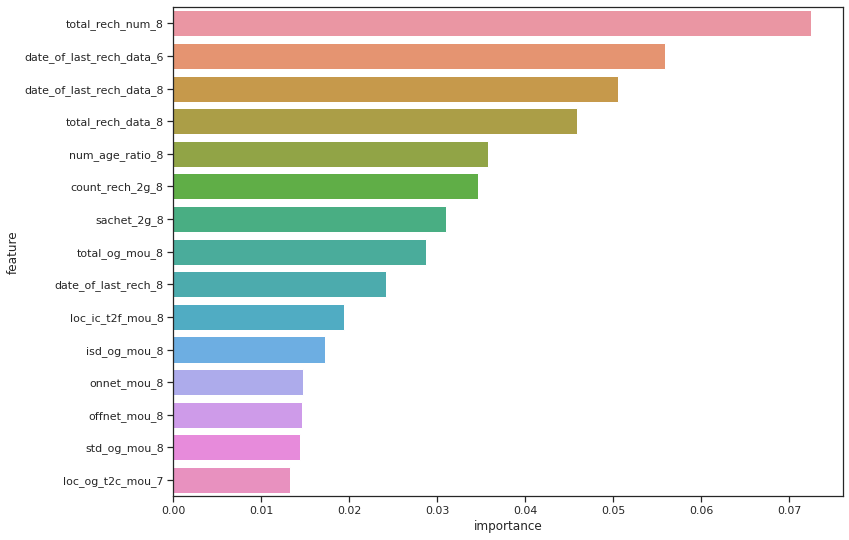

In [233]:
# Most important features

lm_df = pd.DataFrame({'feature' : list(X.columns), 'importance' : abs(logreg.coef_[0])})
lm_df = lm_df.sort_values(by = 'importance', ascending = False).head(15)
fig = plt.figure(figsize = (12, 9))
sns.barplot(data = lm_df, y = 'feature', x = 'importance')
plt.show()

#### Logistics Regression Conclusion

1. The latest month is of importance.
2. The age of last recharge in latest month is the most important feature, depicted by 'date_of_last_rech_8'.
3. The total number of recharges is also an important factor.
4. Minutes of use, data recharges and special scheme in month 8 

## Top features

Based on the Logistic Regression model, the following features are effective

In [157]:
lm_df['feature']

26         date_of_last_rech_8
25            total_rech_num_8
9               total_og_mou_8
21              total_ic_mou_8
23                isd_ic_mou_8
7                 isd_og_mou_8
0                  onnet_mou_8
1                 offnet_mou_8
12            loc_ic_t2f_mou_8
29           total_rech_data_8
31                 sachet_2g_8
32             num_age_ratio_8
6                 std_og_mou_8
28    date_of_last_rech_data_8
19                std_ic_mou_8
Name: feature, dtype: object

## PCA Components

Using up-sampled data for PCA process

In [237]:
x.shape

(69999, 214)

In [241]:
y = df_train['churn_probability']
y.shape

(69999,)

In [244]:
xt.shape

(30000, 214)

In [242]:
X_train, X_test, y_train, y_test = train_test_split(x,y, \
                                                    test_size=0.3, \
                                                    random_state = 100, \
                                                    stratify=y)

In [243]:
# Undertake standard scaling of independent variables.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
xt = scaler.transform(xt)

In [245]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95, svd_solver = 'full', random_state = 100)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents)

In [246]:
test_components = pca.transform(X_test)
X_test_pca = pd.DataFrame(data = test_components)

## Logistics Regression with PCA

In [247]:
y_test.shape

(21000,)

In [248]:
X_test_pca.shape

(21000, 118)

In [249]:
from sklearn.linear_model import LogisticRegression
X_train_pca = principalDf.copy()
logistic=LogisticRegression()
logistic.fit(X=X_train_pca,y=y_train)
logistic.predict(X_test_pca)
score_2=logistic.score(X_test_pca,y_test)
print(score_2)

0.9032380952380953


In [250]:
pred_proba = logistic.predict_proba(X_test_pca)

In [251]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_proba[:,1]))

'0.88'

In [ ]:
print(classification_report(y_test, pred_proba[:,1]))

In [252]:
# Transform on unseen data

pcomp_unseen = pca.transform(xt)
princDf_unseen = pd.DataFrame(data = pcomp_unseen)

In [253]:
us_pred = logistic.predict(princDf_unseen)
us_pred = pd.DataFrame(us_pred)

In [254]:
us_pred.groupby(0)[0].count()

0
0.0    29164
1.0      836
Name: 0, dtype: int64

In [255]:
us_pred = us_pred.reset_index()

In [256]:
us_pred.columns

Index(['index', 0], dtype='object')

In [257]:
us_pred.rename(columns={'index':'id',0:'churn_probability'}, inplace=True)

In [258]:
us_pred.columns

Index(['id', 'churn_probability'], dtype='object')

In [259]:
us_pred['id'] = us_pred['id'] + 69999

In [260]:
us_pred.head()

,id,churn_probability
0,69999,0.0
1,70000,0.0
2,70001,0.0
3,70002,0.0
4,70003,0.0


In [261]:
us_pred.to_csv('Ram_Prayag_PCA_LR.csv',index = False)

## Using k-band with Cross Validation

Use logistics regression cv tool of sklearn on pca components

### With PCA

In [262]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, scoring='accuracy', n_jobs=-1, random_state = 100)
cvComponents = clf.fit(X_train_pca, y_train)

In [263]:
clf.predict(X_test_pca)

array([0., 0., 0., ..., 0., 0., 0.])

In [264]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, clf.predict_proba(X_train_pca)[:, 1])

0.8780718315573922

### Using plain x and y with LogisticsRegressionCV

In [ ]:
clf = LogisticRegressionCV(cv=5, scoring='roc_auc', n_jobs=-1, random_state = 100)
clf.fit(x,y)
roc_auc_score(y, clf.predict_proba(x)[:, 1])

KeyboardInterrupt: ignored

In [265]:
us_comp = pca.transform(xt)
X_us_pca = pd.DataFrame(data = us_comp)

In [266]:
cv_unseen = clf.predict(X_us_pca)
cv_unseen = pd.DataFrame(cv_unseen)
cv_unseen.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [267]:
cv_unseen.reset_index(inplace = True)
cv_unseen.rename(columns = {'index':'id',0:'churn_probability'}, inplace = True)
cv_unseen['id'] = cv_unseen['id'] + 69999
cv_unseen.to_csv('Ram_Prayag_pca_clf5.csv', index=False)
cv_unseen.groupby('churn_probability')['churn_probability'].count()

churn_probability
0.0    29154
1.0      846
Name: churn_probability, dtype: int64

## Support Vector Machine

In [354]:
import cvxopt
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [355]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, stratify=y)

In [ ]:
y_train.shape

In [357]:
X_train.shape

(48999, 214)

In [358]:
from sklearn import svm

In [359]:
svm = svm.SVC()
svm.fit(X_train, y_train)

SVC()

### Confusion Matrix

In [360]:
y_pred = svm.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[18860,     0],
       [ 2140,     0]])

In [361]:
svc = LinearSVC()
svc.fit(X_train, y_train)

LinearSVC()

In [362]:
y_pred_svc = svc.predict(X_test)
confusion_matrix(y_test, y_pred_svc)

array([[18474,   386],
       [ 1911,   229]])

### Predict on test.csv

In [363]:
xt = df[df['churn_probability'].isna()].drop('churn_probability', axis = 1)

In [364]:
svm_unseen = svc.predict(xt)

In [365]:
svm_unseen

array([0., 0., 0., ..., 0., 0., 0.])

In [366]:
svm_unseen = pd.DataFrame(svm_unseen)

In [367]:
svm_unseen.reset_index(inplace = True)
svm_unseen.rename(columns = {'index':'id',0:'churn_probability'}, inplace = True)
svm_unseen['id'] = svm_unseen['id'] + 69999
svm_unseen['churn_probability'] = svm_unseen['churn_probability'].astype(int)
svm_unseen.to_csv('Ram_Prayag_svm.csv', index=False)

In [368]:
svm_unseen.groupby('churn_probability')['churn_probability'].count()

churn_probability
0    29997
1        3
Name: churn_probability, dtype: int64

## Random Forest

In [268]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [269]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X_train.columns, 
                    class_names=['Churn', "No Churn"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [270]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [271]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [272]:
rf = RandomForestClassifier(random_state=100, n_estimators=200, max_depth=10, \
                            n_jobs = -1, oob_score=True)

In [273]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=-1,
                       oob_score=True, random_state=100)

In [274]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=10, max_features='auto',
                       random_state=186422792)

In [ ]:
# sample_tree = rf.estimators_[4]

In [ ]:
# gph = get_dt_graph(sample_tree)
# Image(gph.create_png(), width=1000, height=700)

In [ ]:
# gph = get_dt_graph(rf.estimators_[2])
# Image(gph.create_png(), width=1000, height=700)

In [275]:
evaluate_model(rf)

Train Accuracy : 0.9498765280924101
Train Confusion Matrix:
[[43326   681]
 [ 1775  3217]]
--------------------------------------------------
Test Accuracy : 0.9414285714285714
Test Confusion Matrix:
[[18543   317]
 [  913  1227]]


In [276]:
rf_us = rf.predict(xt)
rf_us = pd.DataFrame(rf_us)
rf_us.reset_index(inplace = True)
rf_us.rename(columns = {'index':'id',0:'churn_probability'}, inplace = True)
rf_us['id'] = rf_us['id'] + 69999
rf_us.to_csv('Ram_Prayag_rf.csv', index = False)

In [277]:
rf_us.groupby('churn_probability')['churn_probability'].count()

churn_probability
0.0    27634
1.0     2366
Name: churn_probability, dtype: int64

In [278]:
# checking the oob score
rf.oob_score_

0.941835547664238

#### Grid search for hyper-parameter tuning

In [279]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [280]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100, 200],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [281]:
# Instantiate the grid search model
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv = 4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [282]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 150 candidates, totalling 600 fits
CPU times: user 58.5 s, sys: 2.53 s, total: 1min 1s
Wall time: 51min 33s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [283]:
rf_best = grid_search.best_estimator_

In [284]:
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [285]:
evaluate_model(rf_best)

Train Accuracy : 0.96132574134166
Train Confusion Matrix:
[[43628   379]
 [ 1516  3476]]
--------------------------------------------------
Test Accuracy : 0.9418095238095238
Test Confusion Matrix:
[[18545   315]
 [  907  1233]]


In [286]:
sample_tree = rf_best.estimators_[0]

Use Estimators to train model with max_depth=10, min_samples_leaf=10, n_jobs=-1

In [287]:
rf = RandomForestClassifier(random_state=100, n_estimators=100, max_depth=10, \
                            min_samples_leaf=10, n_jobs = -1, oob_score=True)

In [289]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_jobs=-1,
                       oob_score=True, random_state=100)

In [290]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_leaf=10,
                       random_state=186422792)

In [291]:
sample_tree = rf.estimators_[4]

In [292]:
evaluate_model(rf)

Train Accuracy : 0.9461009408355272
Train Confusion Matrix:
[[43279   728]
 [ 1913  3079]]
--------------------------------------------------
Test Accuracy : 0.9419047619047619
Test Confusion Matrix:
[[18551   309]
 [  911  1229]]


In [293]:
rf_us = rf.predict(xt)
rf_us = pd.DataFrame(rf_us)
rf_us.reset_index(inplace = True)
rf_us.rename(columns = {'index':'id',0:'churn_probability'}, inplace = True)
rf_us['churn_probability'] = rf_us['churn_probability'].astype(int)
rf_us['id'] = rf_us['id'] + 69999
rf_us.to_csv('Ram_Prayag_rf_gdcv.csv', index = False)

In [294]:
rf_us.groupby('churn_probability')['churn_probability'].count()

churn_probability
0    27661
1     2339
Name: churn_probability, dtype: int64

In [295]:
# checking the oob score
rf.oob_score_

0.9418967734035388

In [296]:
y_pred = rf.predict(X_test)

In [297]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97     18860
         1.0       0.80      0.57      0.67      2140

    accuracy                           0.94     21000
   macro avg       0.88      0.78      0.82     21000
weighted avg       0.94      0.94      0.94     21000



In [298]:
# Confusion Matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[18551   309]
 [  911  1229]]


Previous CM @ 101100
[[18551   309]

 [  911  1229]]

### Variable importance in RandomForest and Decision trees

In [ ]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [ ]:
classifier_rf.fit(X_train, y_train)

In [ ]:
classifier_rf.feature_importances_

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": classifier_rf.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)

## XG Boost

In [308]:
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [334]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [4, 5, 7]
        }

In [335]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=200, objective=
                    'binary:logistic', silent=True, nthread=1)

In [336]:
y = df_train['churn_probability']

In [337]:
x.shape

(69999, 214)

In [340]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(x,y, test_size=0.3, stratify=y)

In [341]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, 
                                   n_iter=param_comb, 
                                   scoring='roc_auc', 
                                   n_jobs=4, 
                                   cv=skf.split(X_train, y_train), 
                                   verbose=3, 
                                   random_state=1001 )

# Random search fitting
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f6feb7b8dd0>,
                   estimator=XGBClassifier(learning_rate=0.02, n_estimators=200,
                                           nthread=1, silent=True),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [4, 5, 7],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='roc_auc', verbose=3)

In [342]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
# results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([165.44211578, 270.23610187, 234.62600239, 151.3939112 ,
       139.50087587]), 'std_fit_time': array([ 0.51925823,  1.73963844, 18.65312029,  1.47524013, 13.22240961]), 'mean_score_time': array([0.4204692 , 0.84632246, 0.74205796, 0.63965344, 0.23151898]), 'std_score_time': array([0.02689544, 0.06146502, 0.1041926 , 0.00888316, 0.05584618]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[4, 7, 7, 7, 5],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_val

In [343]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.8, gamma=1, learning_rate=0.02, max_depth=7,
              min_child_weight=5, n_estimators=200, nthread=1, silent=True,
              subsample=0.8)

In [344]:
xgb = random_search.best_estimator_

In [345]:
xt = df[df['churn_probability'].isna()].drop('churn_probability', axis = 1)

In [332]:
xgb.score(x,y)

0.9450135001928599

In [333]:
xgb.get_params

<bound method XGBModel.get_params of XGBClassifier(colsample_bytree=0.6, gamma=5, learning_rate=0.02, max_depth=5,
              min_child_weight=5, n_estimators=200, nthread=1, silent=True,
              subsample=1.0)>

In [346]:
xgb.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.8, gamma=1, learning_rate=0.02, max_depth=7,
              min_child_weight=5, n_estimators=200, nthread=1, silent=True,
              subsample=0.8)

#### Confusion Matrix

In [349]:
y_pred = xgb.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[18443   417]
 [  792  1348]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     18860
         1.0       0.76      0.63      0.69      2140

    accuracy                           0.94     21000
   macro avg       0.86      0.80      0.83     21000
weighted avg       0.94      0.94      0.94     21000



### Predict on test.csv

In [350]:
y_us = xgb.predict(xt)
results_df = pd.DataFrame(data={'id':xt.id, 'churn_probability':y_us.astype(int)})
results_df.to_csv('Ram_Prayag_XGB.csv', index=False)

In [351]:
results_df.shape

(30000, 2)

In [352]:
results_df.head()

,id,churn_probability
69999,69999,0
70000,70000,0
70001,70001,1
70002,70002,0
70003,70003,0


In [353]:
results_df.groupby('churn_probability')['churn_probability'].count()

churn_probability
0    27433
1     2567
Name: churn_probability, dtype: int64

### XG Boost with over sampling

In [370]:
os = SMOTE(random_state=0)

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=X_train.columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['churn_probability'])

In [ ]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, 
                                   n_iter=param_comb, 
                                   scoring='accuracy', 
                                   n_jobs=4, 
                                   cv=skf.split(os_data_X, os_data_y), 
                                   verbose=3, 
                                   random_state=1001 )

# Random search fitting
random_search.fit(os_data_X, os_data_y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
# results.to_csv('xgb-random-grid-search-results-01.csv', index=False)

In [ ]:
random_search.best_estimator_

In [ ]:
xgb = random_search.best_estimator_

In [ ]:
xt = df[df['churn_probability'].isna()].drop('churn_probability', axis = 1)

In [ ]:
xgb.score(os_data_X, os_data_y)

0.9450135001928599

In [ ]:
xgb.get_params

<bound method XGBModel.get_params of XGBClassifier(colsample_bytree=0.6, gamma=5, learning_rate=0.02, max_depth=5,
              min_child_weight=5, n_estimators=200, nthread=1, silent=True,
              subsample=1.0)>

In [ ]:
xgb.fit(os_data_X, os_data_y)

XGBClassifier(colsample_bytree=0.8, gamma=1, learning_rate=0.02, max_depth=7,
              min_child_weight=5, n_estimators=200, nthread=1, silent=True,
              subsample=0.8)

#### Confusion Matrix

In [ ]:
y_pred = xgb.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix', cm)
print()
print('\n Classification Report',classification_report(y_test, y_pred))

[[18443   417]
 [  792  1348]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     18860
         1.0       0.76      0.63      0.69      2140

    accuracy                           0.94     21000
   macro avg       0.86      0.80      0.83     21000
weighted avg       0.94      0.94      0.94     21000



#### Predict on test.csv

In [ ]:
y_us = xgb.predict(xt)
results_df = pd.DataFrame(data={'id':xt.id, 'churn_probability':y_us.astype(int)})
results_df.to_csv('Ram_Prayag_XGB_os.csv', index=False)

In [ ]:
results_df.shape

(30000, 2)

In [ ]:
results_df.head()

,id,churn_probability
69999,69999,0
70000,70000,0
70001,70001,1
70002,70002,0
70003,70003,0


In [ ]:
results_df.groupby('churn_probability')['churn_probability'].count()

churn_probability
0    27433
1     2567
Name: churn_probability, dtype: int64